# Linear Regression

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
insurance = pd.read_csv('insurance.csv')

# Initial Thoughts

In [48]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


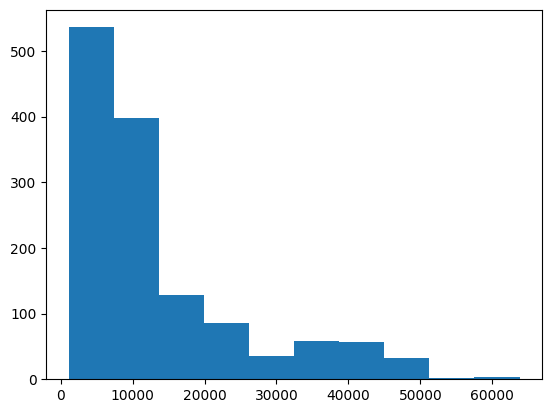

In [49]:
plt.hist(insurance['charges'])
plt.show()

May be worthwhile to perform a log transformation to get less biased errors.

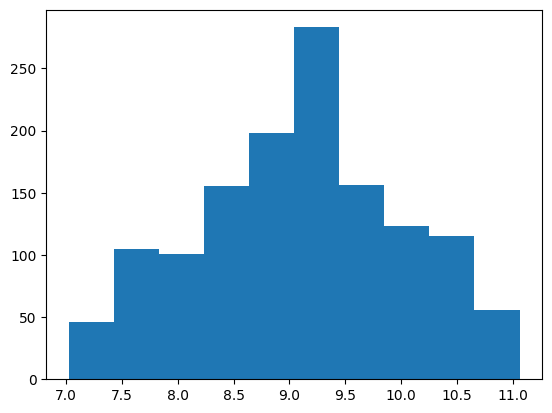

In [50]:
insurance['log_charges'] = np.log(insurance['charges'])
plt.hist(insurance['log_charges'])
plt.show()

Looks better.

In [51]:
insurance.corr()

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


Here we see that charges most strongly correlate with age and bmi, less so with children.

<AxesSubplot:title={'center':'log_charges'}, xlabel='sex'>

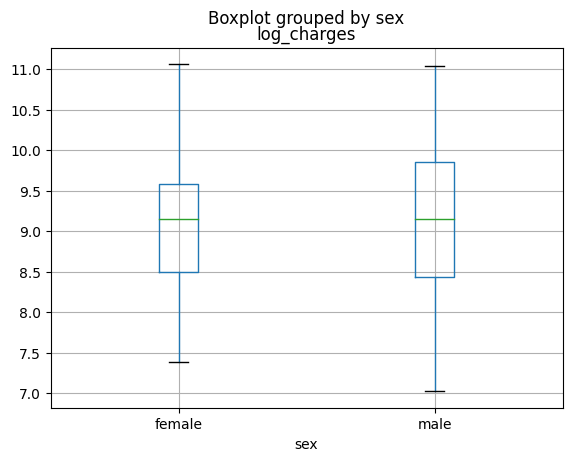

In [52]:
insurance.boxplot(column='log_charges', by='sex')

<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

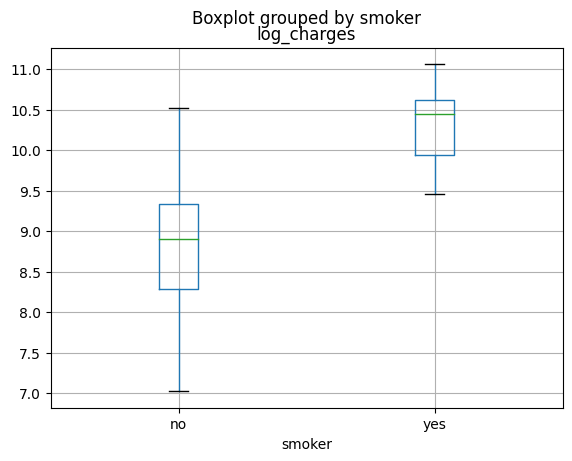

In [53]:
insurance.boxplot(column='log_charges', by='smoker')

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

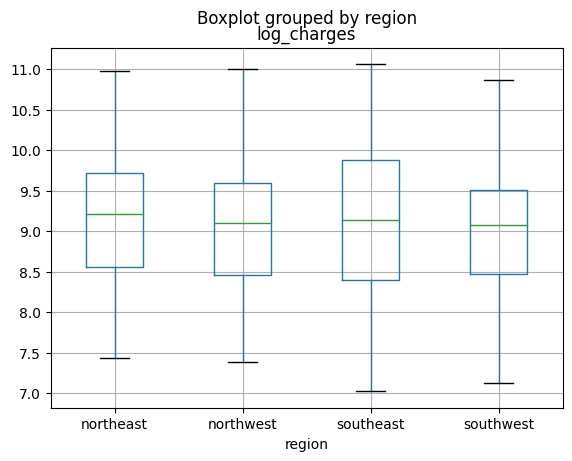

In [54]:
insurance.boxplot(column='log_charges', by='region')

We see that males have a wider distribution on charges, and that smokers have a much higher mean on average charges. This makes sense.

# ML model

In [55]:
insurance['smoker_status'] = insurance['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [56]:
X = insurance[['age','bmi','smoker_status']]
y= insurance['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[0.03483296 0.01115155 1.54858914]


In [58]:
y_predicted = model.predict(X_train)
mse = mean_squared_error(y_train, y_predicted)
print(mse)

0.2182978674222121


R^2 of 0.217 is not the worst, but could be better.

In [61]:
r2 = r2_score(y_train, y_predicted)
print(r2)

0.737066139753993


# Diagnostics

<AxesSubplot:xlabel='predicted', ylabel='residuals'>

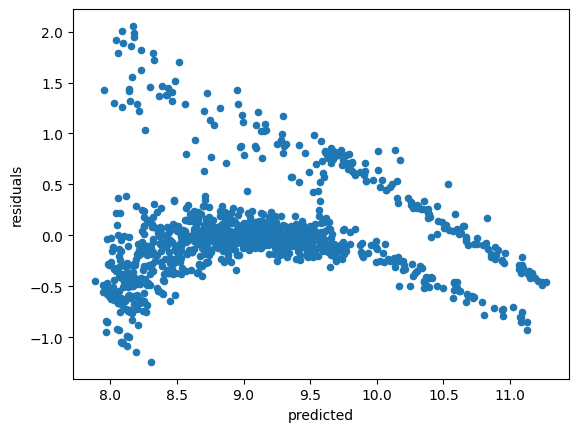

In [63]:
residuals = y_train - y_predicted
diagnostics = pd.DataFrame()
diagnostics['residuals'] = residuals
diagnostics['predicted'] = y_predicted
diagnostics.plot.scatter(x = 'predicted', y='residuals')

If we had a proper model, we would see the residuals average 0, with consistent variation across the x-axis. We do not see that here. As the predicted values get higher, it appears that the residuals converge more and more negatively.

In [65]:
print(model.intercept_)
print(model.coef_)

7.083204040880011
[0.03483296 0.01115155 1.54858914]


Looking at the coefficients, its clear that the strongest predictor for an increase insurance bills is the smoker status, with a 1.54% increase per unit change in smoker status given the other two predictors being held constant.

In [66]:
y_predicted_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
print(mse_test)

0.20635768963740853


The MSE of the test set is similar to the MSE of the training set. With a MSE for both sets around 0.20, we can safely say that there is no overfitting of the model on the training set, and perhaps we can be a little less conservative and include more 

In [59]:
insurance['sex'] = insurance['sex'].apply(lambda x: 1 if x=='male' else 0)
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x=='yes' else 0)
insurance

,age,sex,bmi,children,smoker,region,charges,log_charges,smoker_status
0,19,0,27.900,0,1,southwest,16884.92400,9.734176,1
1,18,1,33.770,1,0,southeast,1725.55230,7.453302,0
2,28,1,33.000,3,0,southeast,4449.46200,8.400538,0
3,33,1,22.705,0,0,northwest,21984.47061,9.998092,0
4,32,1,28.880,0,0,northwest,3866.85520,8.260197,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,9.268661,0
1334,18,0,31.920,0,0,northeast,2205.98080,7.698927,0
1335,18,0,36.850,0,0,southeast,1629.83350,7.396233,0
1336,21,0,25.800,0,0,southwest,2007.94500,7.604867,0
